In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Stellar Structure

In [266]:
def f(m,r,row):                #This function will be used for dm/dr

    return 4*np.pi*r**2*row    #equation 3



#this function is for dp/dr
def H(p,r,eps,m):                  # eps is epsilon(energy density)
    #G = 6.67e-11                   # units m^3 /(kg*s^2)
    G = 4.302e-3*3.09e11            # units km^3 / ( solarMass * s^2)
    c = 3.0e5                      # units km/s
    
    
                     #equation 4
    return ( G*eps*m/(c**2*r**2) )*(1 + p/eps)*(1 + (4*np.pi*r**3*p/(m*c**2) ) ) / (1 - (2*G*m/(c**2*r) ) )*(-1) 

In [274]:
def RK4(r,m,p,i,dr,eps):
    
    c = 3.0e5   #units km/s
    
    k1 = f(m[i],r[i],eps[i]/c**2)                               # k_1 through k_4 are to solve dm/dr with the RK4 method.
    kA = H(p[i],r[i],eps[i],m[i])                               # k_A through k_D are to solve dp/dr with the RK4 method.
    
    k2 = f( m[i] + k1*dr/2 , r[i] + dr/2 , eps[i]/c**2 )
    kB = H( p[i] + kA*dr/2, r[i] + dr/2 , eps[i] , m[i])
    
    k3 = f( m[i] + k2*dr/2 , r[i] + dr/2 , eps[i]/c**2 )
    kC = H( p[i] + kB*dr/2, r[i] + dr/2 , eps[i] , m[i])
    
    k4 = f( m[i] + k3*dr , r[i] + dr ,eps[i]/c**2 )
    kD = H( p[i] + kC*dr, r[i] + dr , eps[i] , m[i])
    
    
    
    m[i+1] = m[i] + (dr/6)*(k1 + 2*k2 + 2*k3 + k4)
    p[i+1] = p[i] + (dr/6)*(kA + 2*kB + 2*kC + kD)
    
    eps[i+1] = 2.4216*(p[i])**(3/5) + 2.8663*p[i]                              # My attempt at solving for energy dens.
    #eps[i+1] = 2.4216*(p[i]*3.0006e-3)**(3/5) + 2.8663*p[i]*3.0006e-3         # I think this is where my code isn't working
    
    return
    

In [275]:
nstep=100
#R = 696e3       #km  of the sun
R = 30           # for a Neutron star units km
#M = 1.989e30    #kg mass of sun
M = 1            # for a Neutron star units solar masses
m = np.zeros(nstep)
m[0] = 0.01
m[-1] = M
r=np.linspace(0,R,nstep)
r[0]= 0.0000001
#r[0] = 0
#r[-1] = R
p = np.zeros(nstep)
#p[0]=0.01
p[0]=10
dr = R/(nstep-1)
eps = np.zeros(nstep)
eps[0] = 3.0006e-3   #  units solar mass / km^3 


for i in range(nstep-1):
    RK4(r,m,p,i,dr,eps)


print('done')

done


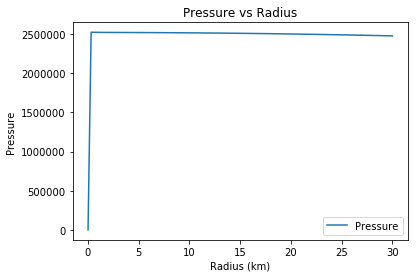

In [283]:
plt.plot(r,p,label="Pressure")
plt.xlabel("Radius (km)")
plt.ylabel("Pressure ")
plt.title("Pressure vs Radius")
plt.legend()
#plt.plot(r,p)
#plt.savefig("Pressure_VS_Radius.jpg")
plt.show()

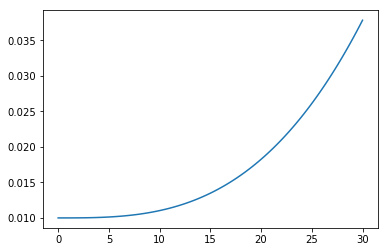

In [273]:
plt.plot(r,m)
plt.show()

# Monte Carlo

In [20]:


def dot():                                     # initializes dots
    x=np.random.random()
    y=np.random.random()*(1-x**2)**2           # ensures dot is within the circle
    
    
    #gives dots a 50% chance to become negative
    if np.random.random() < 0.5: 
        x = x*(-1)
    if np.random.random() < 0.5:
        y = y*(-1)


    return x,y


def inTri(dot1,dot2,dot3):
    center = (0,0)
    
    
    # calculates the area of the different triangles that can be made from the center and the 3 random points.
    area123 = abs(( dot1[0]*( dot2[1] - dot3[1] ) + dot2[0]*( dot3[1] - dot1[1] ) + dot3[0]*( dot1[1] - dot2[1]) )/2)
    areaC12 = abs(( center[0]*( dot1[1] - dot2[1] ) + dot1[0]*( dot2[1] - center[1] ) + dot2[0]*( center[1] - dot1[1]) )/2)
    areaC23 = abs(( center[0]*( dot2[1] - dot3[1] ) + dot2[0]*( dot3[1] - center[1] ) + dot3[0]*( center[1] - dot2[1]) )/2)
    areaC13 = abs(( center[0]*( dot1[1] - dot3[1] ) + dot1[0]*( dot3[1] - center[1] ) + dot3[0]*( center[1] - dot1[1]) )/2)
    
    
    
    
    # determines whether the center is in the triangle. True means that it is in the triangle.
    if area123 == areaC12 + areaC23 + areaC13:
        return True
    else:
        return False

In [29]:
nstep = 3000
nsteps = np.arange(1,nstep,1)

inArray = []

for i in range(1,nstep):
    inside = 0                # This keeps track how many times the center was outside the triangle.
    outside = 0               # This is for the times its outside
    for j in range(i):
        dot1 = dot()
        dot2 = dot()
        dot3 = dot()
        if inTri(dot1,dot2,dot3):
            inside += 1
        else:
            outside += 1
    #print(i)
    inArray.append(inside/i*100)          # divides the inside by interation multiplied by 100 to get a percentage.



print('done')

done


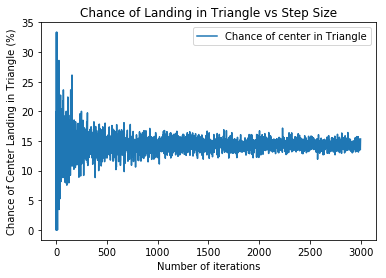

In [291]:
plt.plot(nsteps,inArray,label='Chance of center in Triangle')
plt.title("Chance of Landing in Triangle vs Step Size")
plt.xlabel("Number of iterations")
plt.ylabel("Chance of Center Landing in Triangle (%)")
plt.legend()
plt.savefig("Monte_Carlo_Graph.jpg")
plt.show()

In [51]:
ans = 0
for i in range(nstep-1):                   # This gets an average percent for all iteration to get an answer to question part a.
    ans += inArray[i]
print("The chance of landing inside the triangle is about",ans/nstep,"%")

The chance of landing inside the triangle is about 14.336352902429065 %


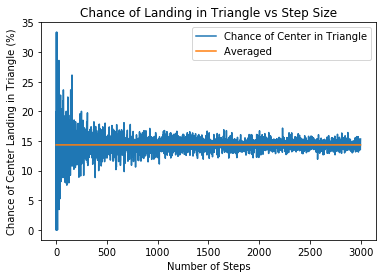

In [58]:
plt.plot(nsteps,inArray,label='Chance of Center in Triangle')
plt.plot(nsteps, avg,label="Averaged ")
plt.title("Chance of Landing in Triangle vs Step Size")
plt.xlabel("Number of Steps")
plt.ylabel("Chance of Center Landing in Triangle (%)")
plt.legend()
#plt.savefig("Monte_Carlo_Graph.pdf")
plt.show()